<a href="https://colab.research.google.com/github/hiyabose/Data-Analysis/blob/master/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Investigate the Gapminder data**
-Dikshita Basu

**Introduction about Gapminder**



Gapminder is an independent Swedish foundation with no political, religious or economic affiliations. Gapminder is a fact tank, not a think tank. Gapminder fights devastating misconceptions about global development. Gapminder produces free teaching resources making the world understandable based on reliable statistics. Gapminder promotes a fact-based worldview everyone can understand.

Instead of wasting our time blaming the media or condemning the human brain, we develop free teaching material to dismantle misconceptions and promote a fact-based worldview. 


# **Questions**


       1. How did the population changed overtime?
       2. which are the most populated countries?
       3. is the global economy increasing?
       4. is life_expectency related to income?
       5. which countriess have developed most over these years?
       6. Is the advancing medical facilities able to increase the life_expectancy rate of the globe?
       


**Data used**
1. Population total
2. Life expectancy (years)
3. Income per person (GPD/Capita, PPP$ inflation-adjusted)

# DATA WRANGLING

In [0]:
!pip install -q pycountry

In [0]:
!pip install -q pycountry_convert

In [7]:
import numpy as np #create arrays
import pandas as pd #handle and wrangle data
import matplotlib.pyplot as plt #plot data
import seaborn as sns #plot data
import missingno as ms #plot missing data

from functools import reduce #merge multiple dataframes together

import pycountry #show country codes to country names
import pycountry_convert #convert the country code to the corresponding continent

#show plots inside this notebook
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' #get better plot quality

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#READ THE DATASET
url = 'https://raw.githubusercontent.com/hiyabose/Data-Analysis/master/Data%20Population%20-%20v5%20-%201800%20to%202100%20World%20Regions%20and%20Countries%20by%20Gapminder%20-%20data-countries-etc-by-year.csv'
population = pd.read_csv(url)
url1='https://raw.githubusercontent.com/hiyabose/Data-Analysis/master/life_expectancy_years.csv'
life_expectancy = pd.read_csv(url1)
url2 = 'https://raw.githubusercontent.com/hiyabose/Data-Analysis/master/income_per_person_gdppercapita_ppp_inflation_adjusted.csv'
income = pd.read_csv(url2)

In [9]:


population.rename(columns = {'name':'country', 'time':'year'}, inplace = True) 
population.head()



geo      country  year  population
0  afg  Afghanistan  1800     3280000
1  afg  Afghanistan  1801     3280000
2  afg  Afghanistan  1802     3280000
3  afg  Afghanistan  1803     3280000
4  afg  Afghanistan  1804     3280000

In [10]:
convert_pop = {'year': object, 
               } 
  
population = population.astype(convert_pop)  


population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59297 entries, 0 to 59296
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   geo         59297 non-null  object
 1   country     59297 non-null  object
 2   year        59297 non-null  object
 3   population  59297 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.8+ MB


In [11]:
life_expectancy.head()

country  1800  1801  1802  1803  ...  2096  2097  2098  2099  2100
0  Afghanistan  28.2  28.2  28.2  28.2  ...  77.1  77.3  77.4  77.5  77.7
1      Albania  35.4  35.4  35.4  35.4  ...  87.9  88.0  88.1  88.2  88.3
2      Algeria  28.8  28.8  28.8  28.8  ...  88.8  88.9  89.0  89.1  89.2
3      Andorra   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN
4       Angola  27.0  27.0  27.0  27.0  ...  79.4  79.5  79.7  79.8  79.9

[5 rows x 302 columns]

As we can see that the data is not in a proper form and it is not convinient to make data visualization we melt the table in such a way that each year becomes a row.

In [12]:
#melt the dataframe to get tidy data
life_expectancy_melt = pd.melt(life_expectancy, id_vars = ["country"], var_name = 'year', value_name = 'life_expectancy')

#sort values by country and year
life_expectancy_melt.sort_values(["country", "year"], inplace = True)

#show the head of the dataframe
life_expectancy_melt.head()

country  year  life_expectancy
0    Afghanistan  1800             28.2
187  Afghanistan  1801             28.2
374  Afghanistan  1802             28.2
561  Afghanistan  1803             28.2
748  Afghanistan  1804             28.2

In [13]:
life_expectancy_melt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56287 entries, 0 to 56286
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          56287 non-null  object 
 1   year             56287 non-null  object 
 2   life_expectancy  55528 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.7+ MB


In [14]:
income.head()

country  1800  1801  1802  1803  ...   2036   2037   2038   2039   2040
0  Afghanistan   603   603   603   603  ...   2820   2880   2940   3000   3060
1      Albania   667   667   667   667  ...  21500  21900  22300  22800  23300
2      Algeria   715   716   717   718  ...  15800  16100  16500  16800  17100
3      Andorra  1200  1200  1200  1200  ...  81500  83100  84800  86500  88300
4       Angola   618   620   623   626  ...   6740   6880   7020   7160   7310

[5 rows x 242 columns]

similarly we do with income!

In [15]:
#melt the dataframe to get tidy data
income_melt = pd.melt(income, id_vars = ["country"], var_name = 'year', value_name = 'income')

#sort values by country and year
income_melt.sort_values(["country", "year"], inplace = True)

#show the head of the dataframe
income_melt.head()

country  year  income
0    Afghanistan  1800     603
193  Afghanistan  1801     603
386  Afghanistan  1802     603
579  Afghanistan  1803     603
772  Afghanistan  1804     603

In [16]:
population.head()

geo      country  year  population
0  afg  Afghanistan  1800     3280000
1  afg  Afghanistan  1801     3280000
2  afg  Afghanistan  1802     3280000
3  afg  Afghanistan  1803     3280000
4  afg  Afghanistan  1804     3280000

In [17]:
x = pd.merge(income_melt,life_expectancy_melt,on=["year","country"], how ='left')
x.head()

country  year  income  life_expectancy
0  Afghanistan  1800     603             28.2
1  Afghanistan  1801     603             28.2
2  Afghanistan  1802     603             28.2
3  Afghanistan  1803     603             28.2
4  Afghanistan  1804     603             28.2

In [18]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46513 entries, 0 to 46512
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          46513 non-null  object 
 1   year             46513 non-null  object 
 2   income           46513 non-null  int64  
 3   life_expectancy  44488 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.8+ MB


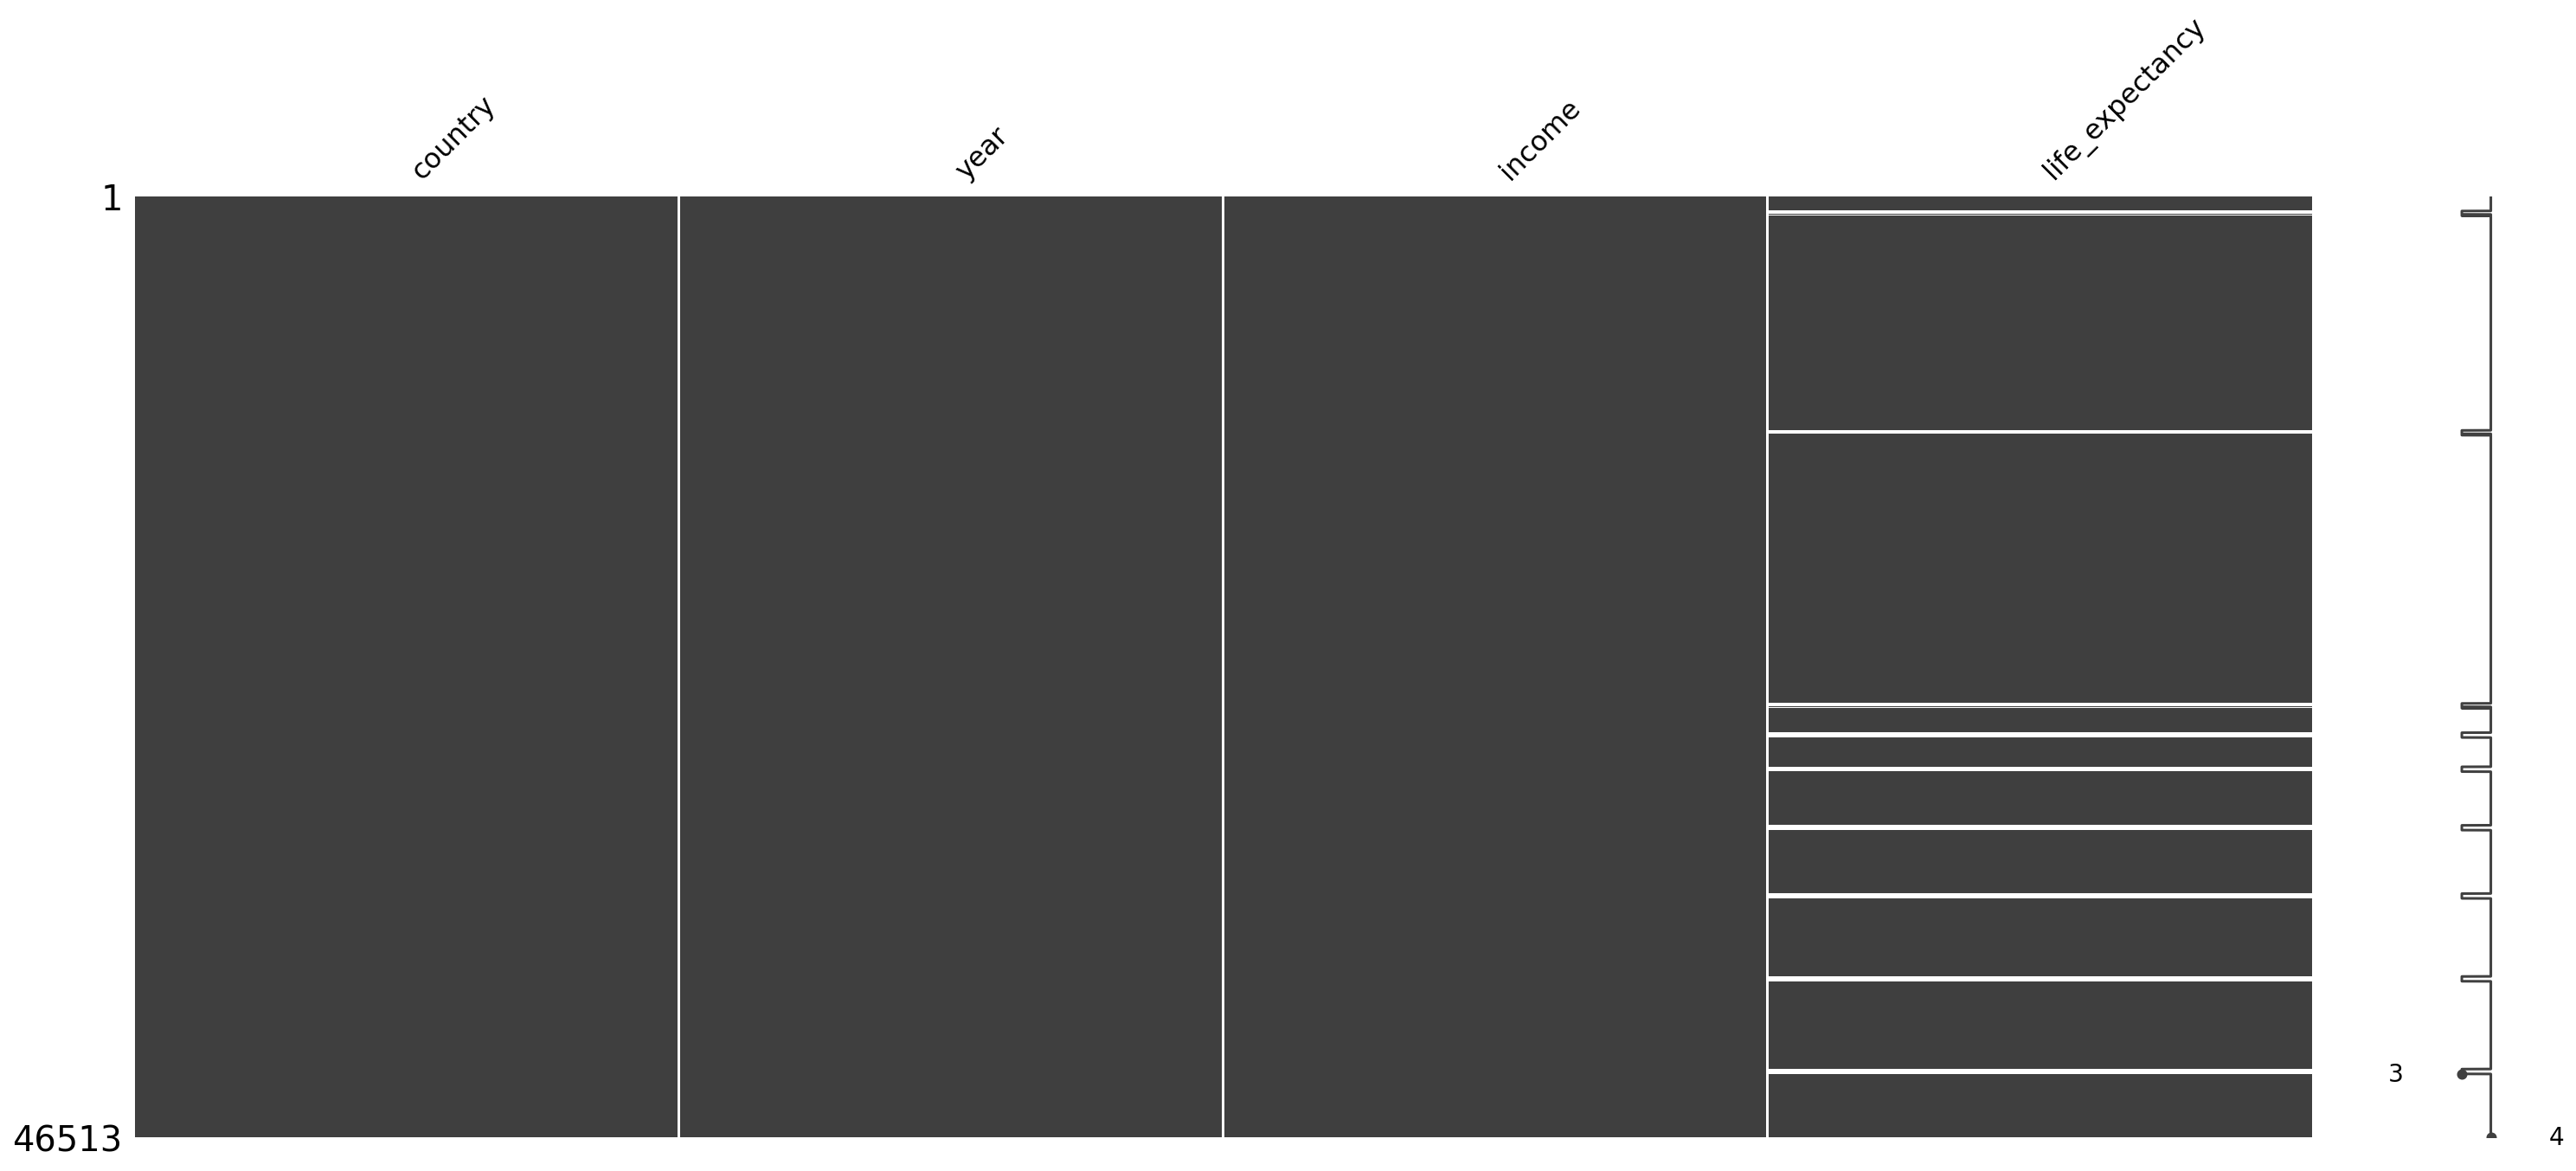

In [19]:
ms.matrix(x)

In [20]:
#handling the missing values
sum(x['life_expectancy'].isna())

2025

In [21]:
# to interpolate the missing values  
x_new=x.interpolate(method ='linear', limit_direction ='forward') 
sum(x_new['life_expectancy'].isna())

0

In [22]:
x_new.max()

country            Zimbabwe
year                   2040
income               179000
life_expectancy        87.7
dtype: object

But here we can see that it will also have the highest population.

In [24]:
x_new.mean()

year                       inf
income             6428.288930
life_expectancy      46.574121
dtype: float64

from this we can see that average income of the world

In [25]:
x_new.country.value_counts()

Malaysia     241
Bhutan       241
Sudan        241
Ukraine      241
Belize       241
            ... 
Cyprus       241
Norway       241
Yemen        241
France       241
Mauritius    241
Name: country, Length: 193, dtype: int64

Therefore we have data off 193 countries

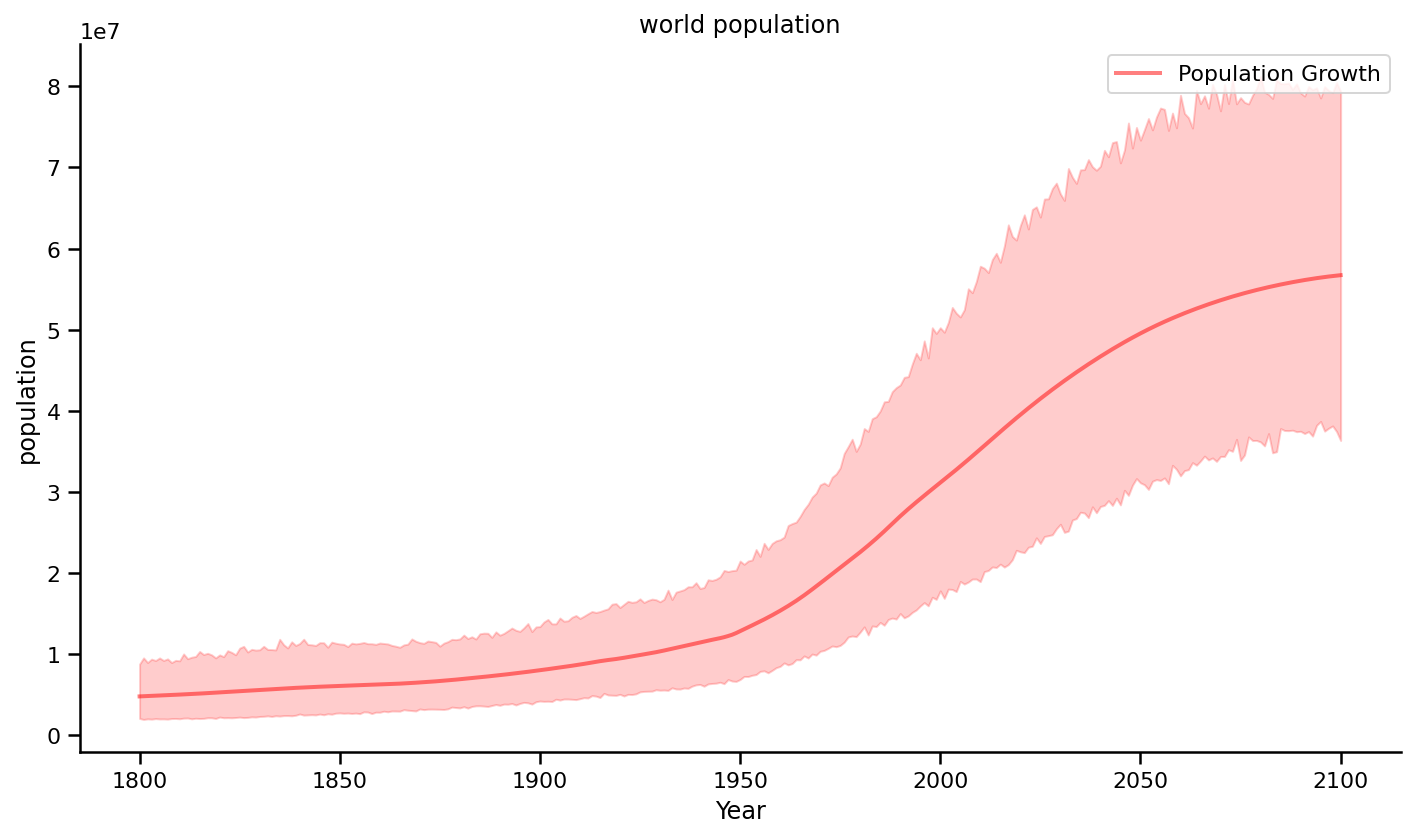

In [26]:
with sns.plotting_context("notebook"):
    #create a matplotlib figure and axes
    fig, ax = plt.subplots(figsize = (10,6))

    #plot the global data with a lineplot
    sns.lineplot(x = "year", y = "population", data = population, label = "Population Growth", alpha = 0.5,
                 color = "red", lw = 2)

    #show the plot-labels in the legend
    ax.legend()
    #set the y label of the plot
    ax.set_ylabel("population")
    #set the x label of the plot
    ax.set_xlabel("Year")
    #set the title of the plot
    ax.set_title("world population")
    #disable the right and top spine for better look
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    #tighten the plot layout
    plt.tight_layout()

    #show the plot (basically not necessary for jupyter but I always put it at the end)
    plt.show()

From this graph we can easily conclude that our world population is increasing with the passing years and by the end of 21st century there will be huge increase in population wwhich can have various side-effects too


Also we can see that after 1950 the population started increasing rapidly.

In [0]:
c=population.groupby(['country']).mean()

In [35]:
c.head()

population
country                  
Afghanistan  2.300364e+07
Albania      1.589939e+06
Algeria      2.308190e+07
Andorra      3.192198e+04
Angola       3.054228e+07

In [44]:
import matplotlib.cm as cm
top10 = c.sort_values('population', ascending = False).head(10)
print(top10)

                    population
country                       
China             7.872558e+08
India             7.319474e+08
United States     1.934886e+08
Nigeria           1.634946e+08
Indonesia         1.385225e+08
Pakistan          1.162843e+08
Brazil            9.816176e+07
Russia            9.460032e+07
Bangladesh        8.746820e+07
Congo, Dem. Rep.  7.615824e+07


<BarContainer object of 10 artists>

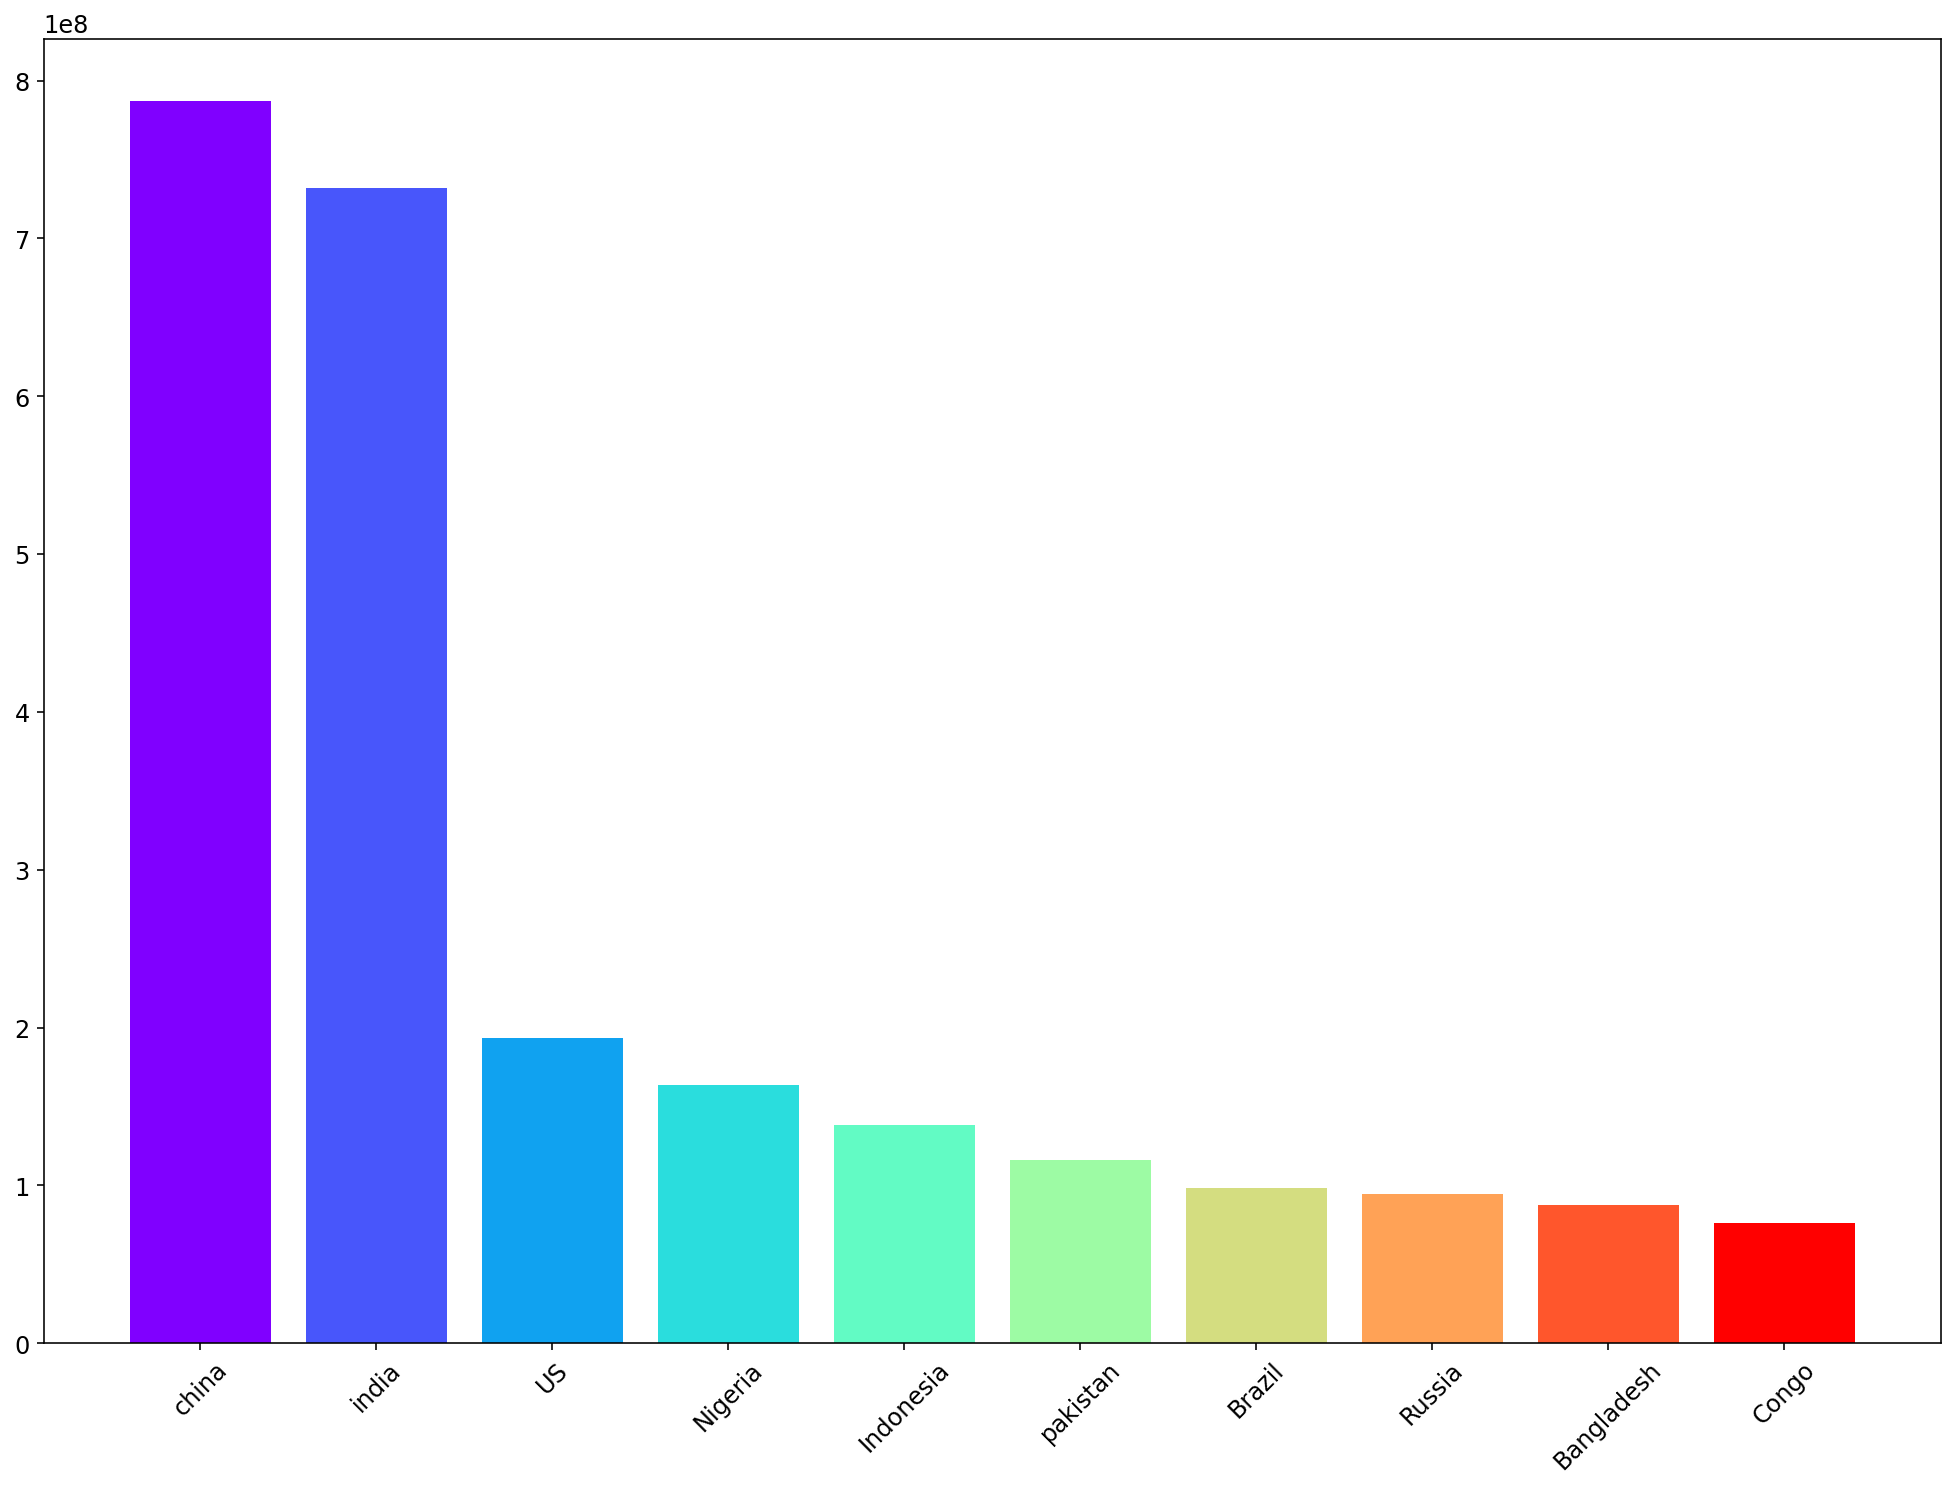

In [89]:
#create the scatter plot
fig, ax = plt.subplots(figsize = (17,12))
    
#https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
plt.rcParams.update({'font.size': 12})
df= pd.DataFrame({'countries':['china','india','US','Nigeria','Indonesia','pakistan','Brazil','Russia','Bangladesh','Congo'], 'pop' :[7.872558e+08, 7.319474e+08,  1.934886e+08,  1.634946e+08,  1.385225e+08,  1.162843e+08,9.816176e+07,  9.460032e+07, 8.746820e+07,  7.615824e+07]})
plt.xticks(rotation = '45')
plt.bar(df['countries'],
        df['pop'],
        color = cm.rainbow(np.linspace(0, 1, len(top10))))

From this Graph we can conclude that China has the Worls's highest population and then India.

In [60]:
#to take out the average income of each country
s=income_melt.groupby(['country']).mean()
s.head()

income
country                  
Afghanistan   1415.522822
Albania       3753.800830
Algeria       5126.709544
Andorra      16605.435685
Angola        2579.821577

In [62]:
topincome = s.sort_values('income', ascending = False).head(10)
print(topincome)

                            income
country                           
Qatar                 40118.049793
Brunei                35838.879668
United Arab Emirates  27926.962656
Luxembourg            26183.775934
Kuwait                24863.153527
Switzerland           24046.390041
Norway                22414.024896
Singapore             20568.921162
Monaco                20039.751037
San Marino            19811.991701


<BarContainer object of 10 artists>

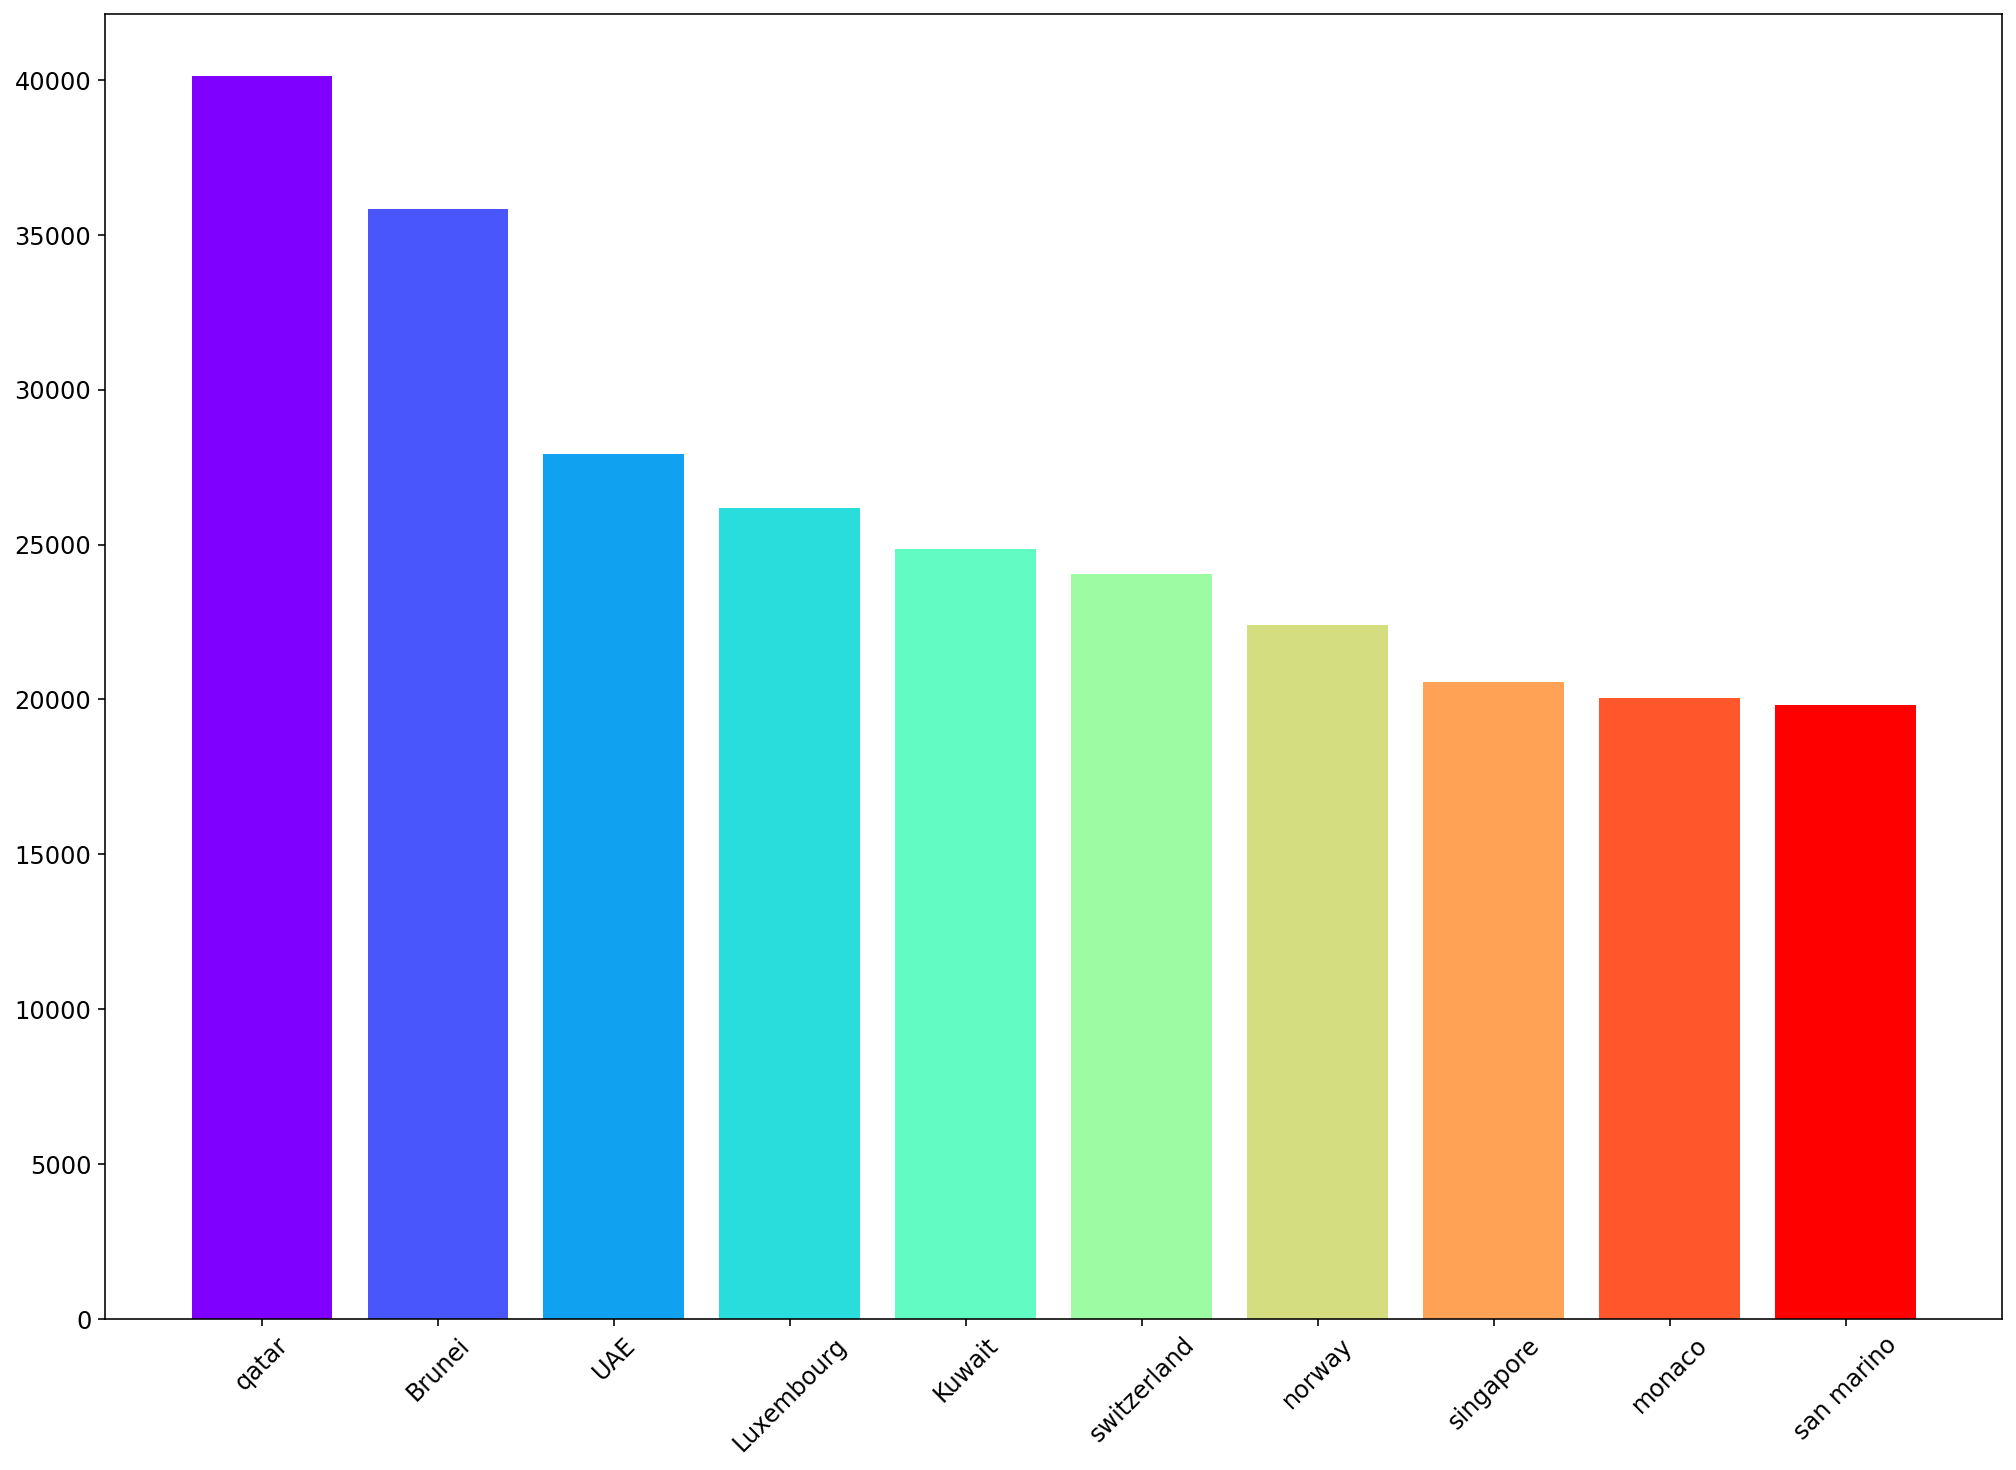

In [88]:
#create the scatter plot
fig, ax = plt.subplots(figsize = (17,12))
    
#https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
plt.rcParams.update({'font.size': 12})
xf= pd.DataFrame({'countries':['qatar','Brunei','UAE','Luxembourg','Kuwait','switzerland','norway','singapore','monaco','san marino'], 'inc' :[40118.049793, 35838.879668, 27926.96265, 26183.775934, 24863.153527, 24046.390041, 22414.024896, 20568.921162, 20039.751037,19811.991701]})
plt.xticks(rotation = '45')
plt.bar(xf['countries'],
        xf['inc'],
        color = cm.rainbow(np.linspace(0, 1, len(top10))))

from this analysis we can say that QATAR is the richest country in the world

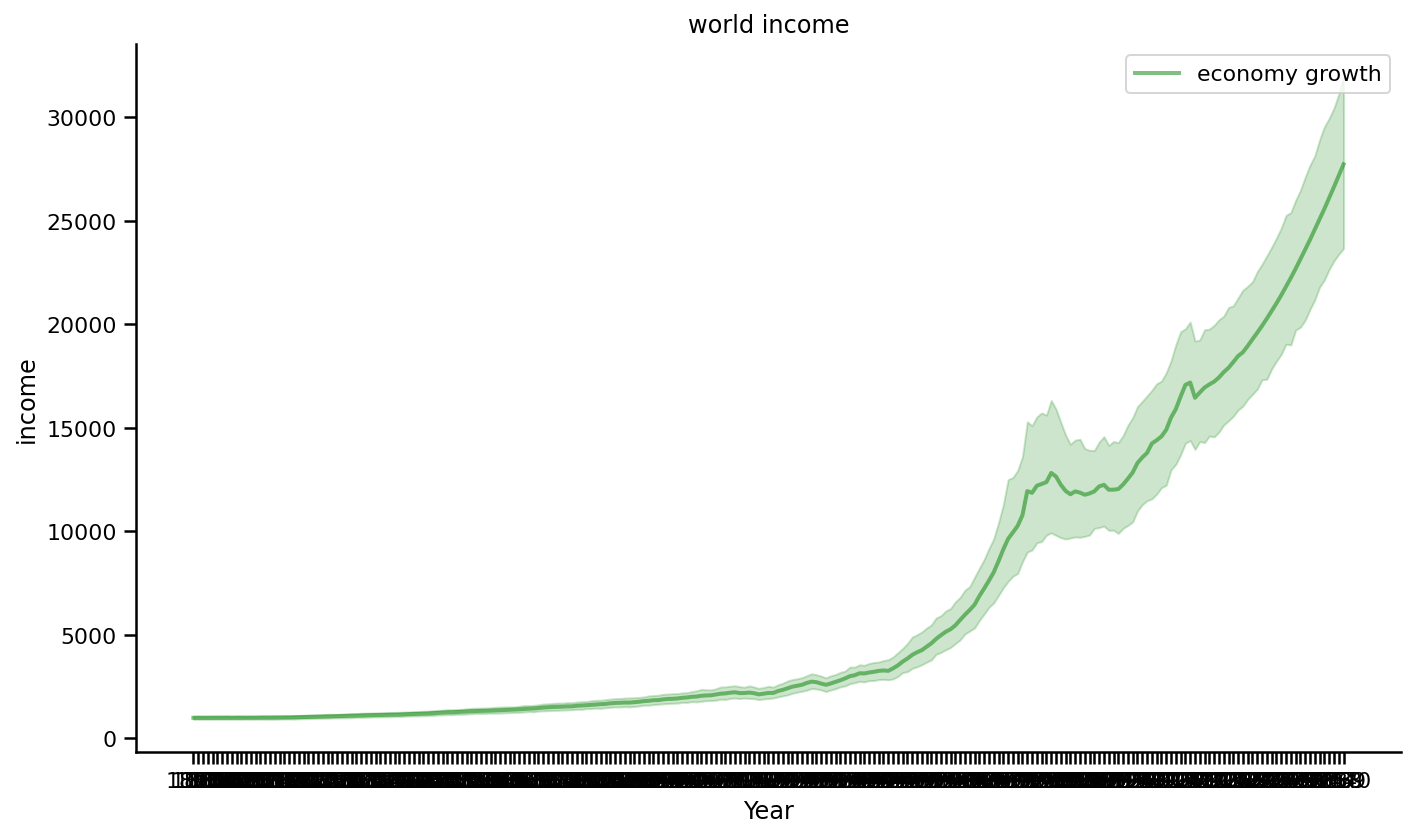

In [65]:
#to plot the world economy
with sns.plotting_context("notebook"):
    #create a matplotlib figure and axes
    fig, ax = plt.subplots(figsize = (10,6))

    #plot the global data with a lineplot
    sns.lineplot(x = "year", y = "income", data = income_melt, label = "economy growth", alpha = 0.5,
                 color = "green", lw = 2)

    #show the plot-labels in the legend
    ax.legend()
    #set the y label of the plot
    ax.set_ylabel("income")
    #set the x label of the plot
    ax.set_xlabel("Year")
    #set the title of the plot
    ax.set_title("world income")
    #disable the right and top spine for better look
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    #tighten the plot layout
    plt.tight_layout()

    #show the plot (basically not necessary for jupyter but I always put it at the end)
    plt.show()

Thus looking at the line graph we can say that the gloabal economy is increasing.

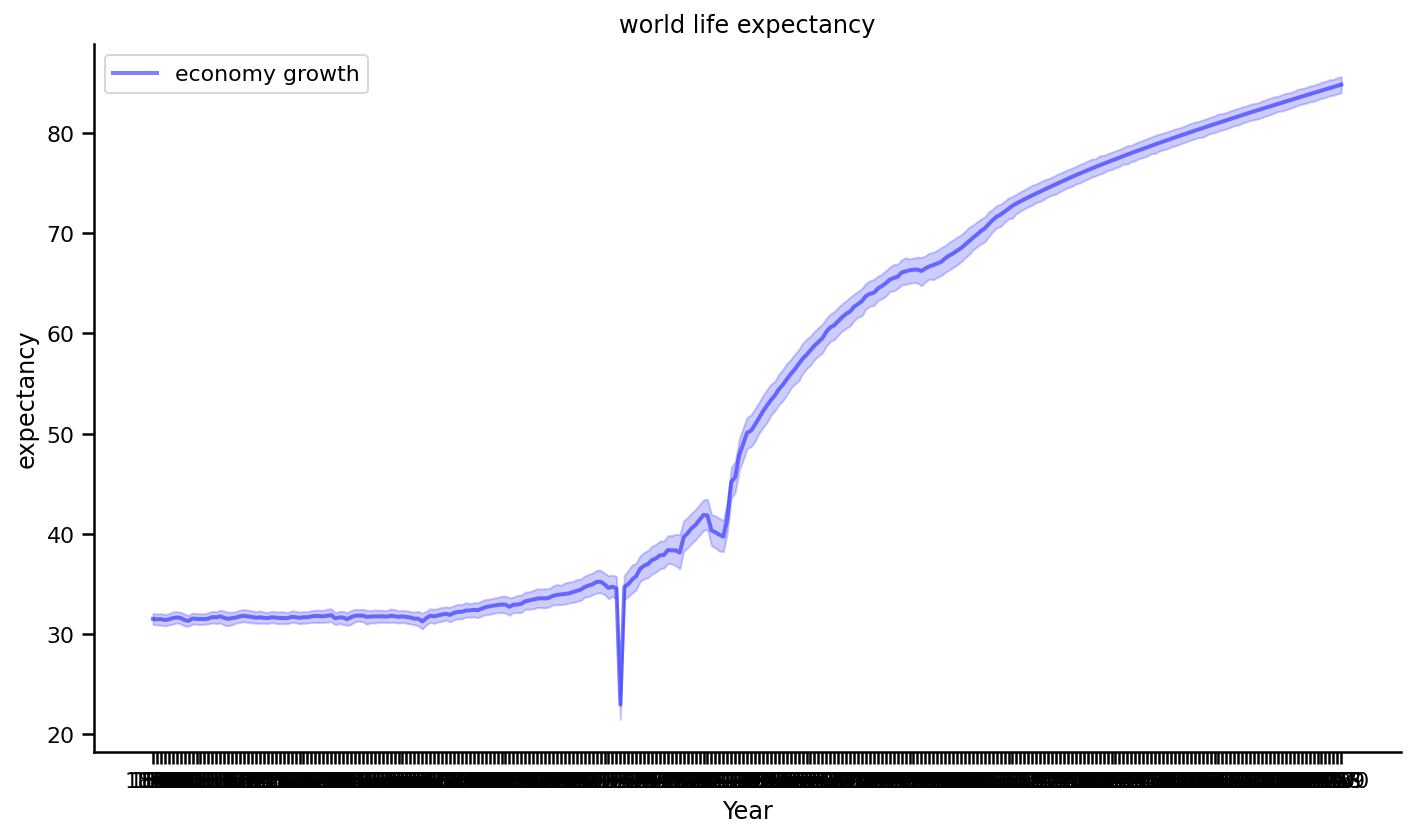

In [69]:
#to plot the life_expectency
with sns.plotting_context("notebook"):
    #create a matplotlib figure and axes
    fig, ax = plt.subplots(figsize = (10,6))

    #plot the global data with a lineplot
    sns.lineplot(x = "year", y = "life_expectancy", data = life_expectancy_melt, label = "economy growth", alpha = 0.5,
                 color = "blue", lw = 2)

    #show the plot-labels in the legend
    ax.legend()
    #set the y label of the plot
    ax.set_ylabel("expectancy")
    #set the x label of the plot
    ax.set_xlabel("Year")
    #set the title of the plot
    ax.set_title("world life expectancy")
    #disable the right and top spine for better look
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    #tighten the plot layout
    plt.tight_layout()

    #show the plot (basically not necessary for jupyter but I always put it at the end)
    plt.show()

From the above graph we can see that there was a sudden drop in life expectancy around 1970 then again it started increasing

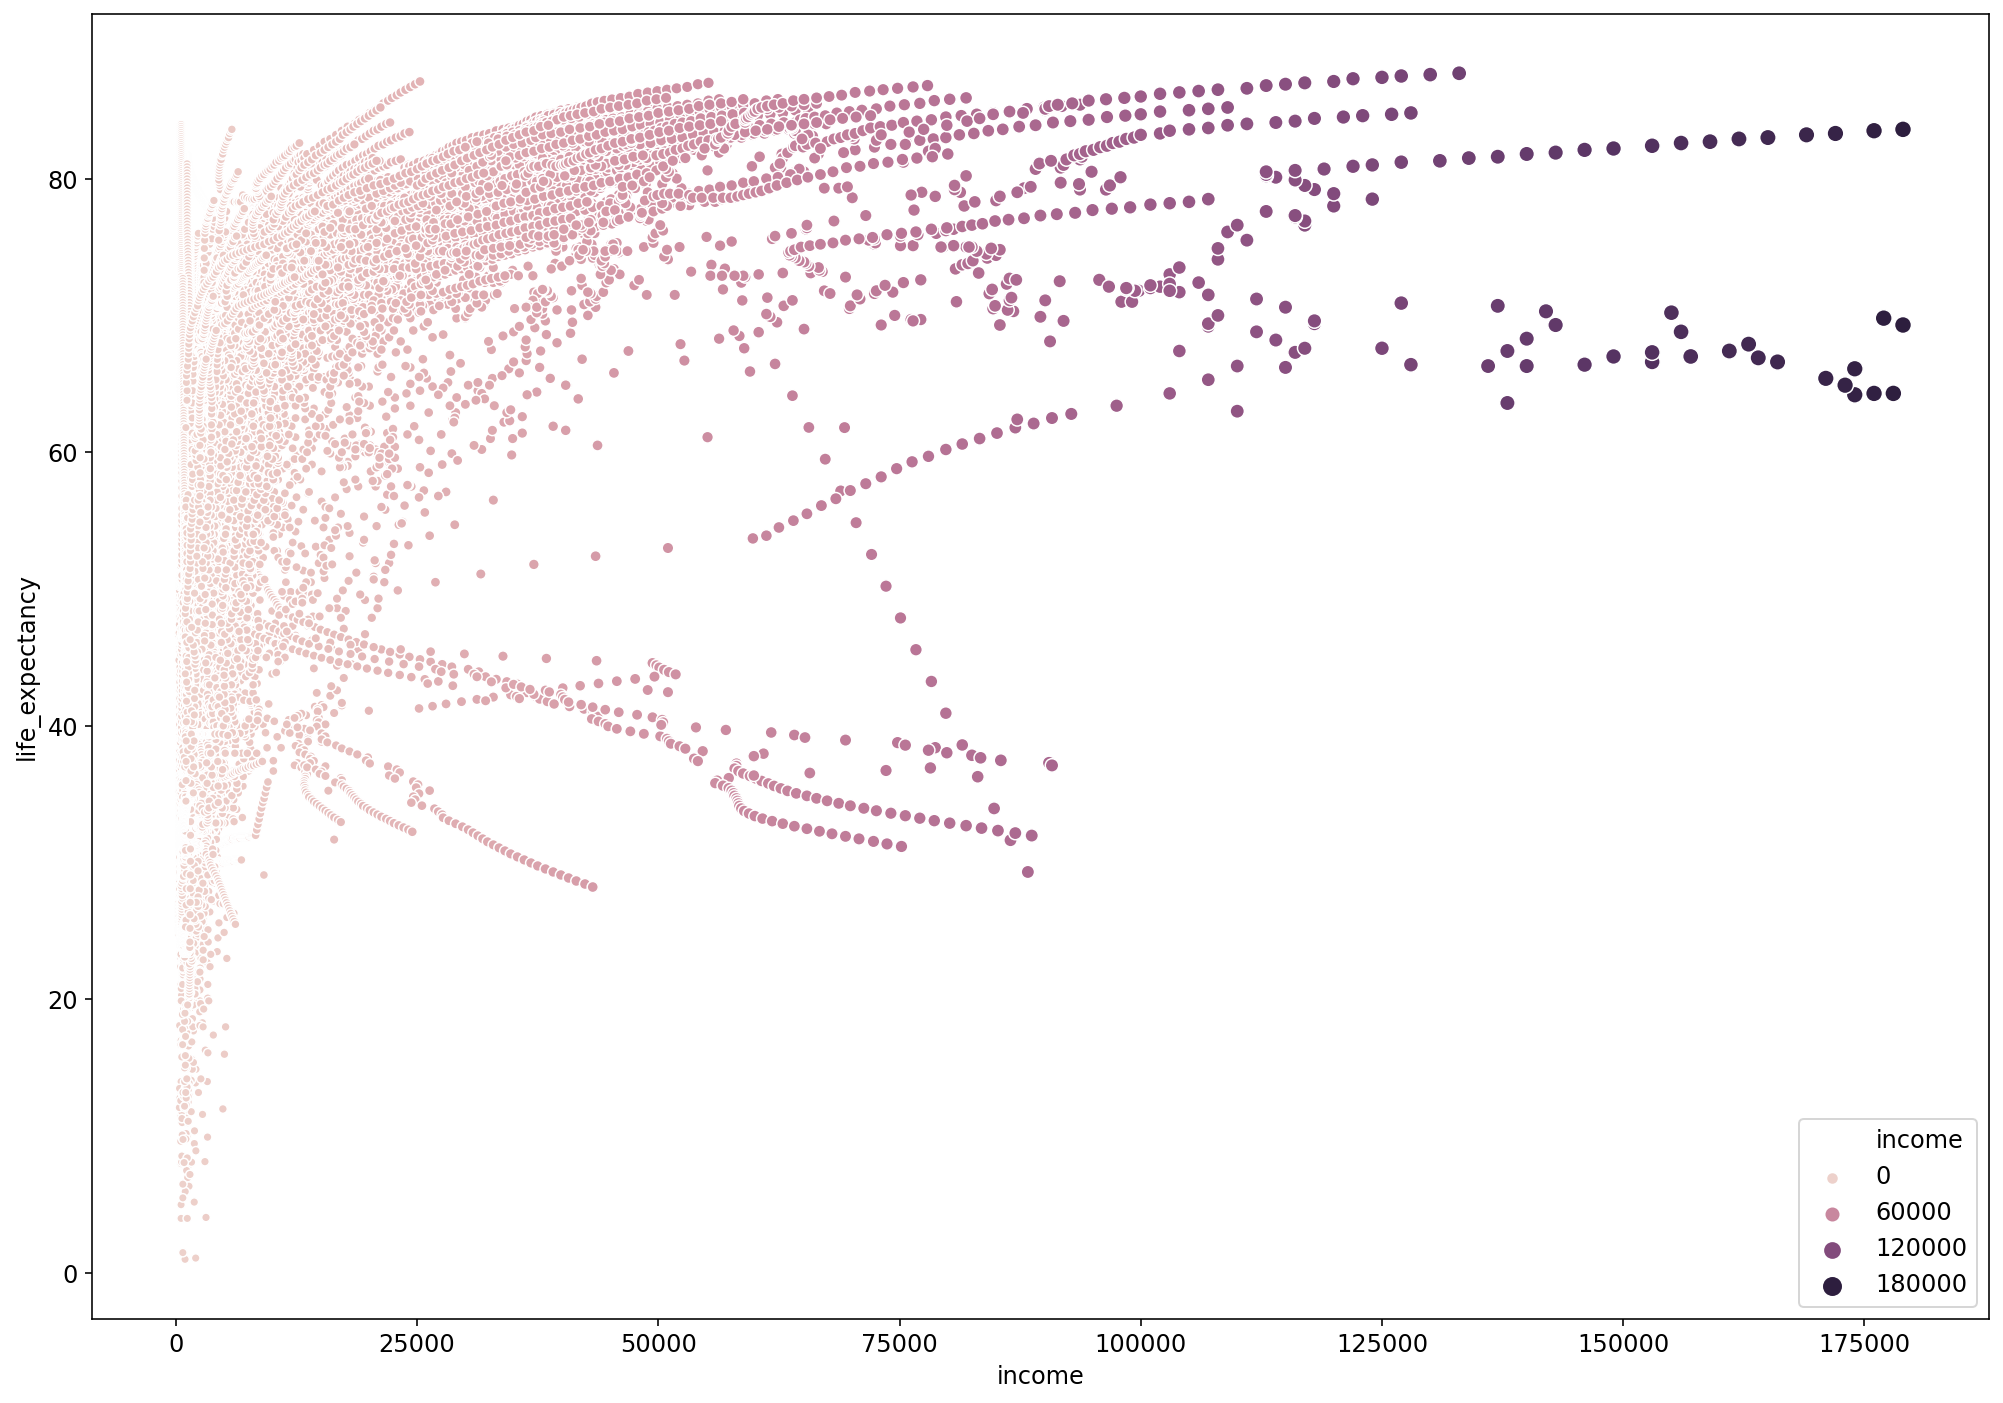

In [87]:
#create the scatter plot
fig, ax = plt.subplots(figsize = (17,12))
    
#https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
plt.rcParams.update({'font.size': 12})
ax = sns.scatterplot(x="income", y="life_expectancy" ,hue = "income",size = "income",data=x_new)

At first the graphs resembles the logarithmic graph.
With increase in income there is a great increase in the life expectancy. But then the life expectancy rate becomes stagnant and doesnot increase with the increase in the income


# REPORT
1. The world population is increasing year by year
2. We can see that an increase in economy is no gurantee for life expectancy which very much proves the saying "HEALTH is WEALTH"
3. The world economy is improving decade by decade.
4. China is leading in terms of population followed by India so their is a need for them to control their populatio in order to be listed in developed country
5. Qatar is the richest country
6. Overall there is a uptrend in population, life expectancy and income .Thus the world is improving
